In [23]:
import pandas as pd
import numpy as np
data=pd.read_csv("CC GENERAL.csv")


In [24]:
data=data.drop("CUST_ID", axis=1)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [25]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [27]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [28]:
data.isnull().sum().sum()

0

In [29]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [37]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=18, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [40]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,14
1,14
2,14
3,14
4,14
...,...
8945,14
8946,14
8947,14
8948,14


In [43]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

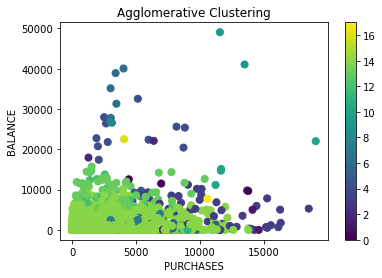

In [48]:
#before Standardization
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES"] , c= agglomerative, s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("BALANCE")
plt.colorbar(scatter)

In [49]:
Sd_data = data

In [50]:
Sd_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Sd_data['BALANCE'] = scaler.fit_transform(Sd_data[['BALANCE']].values)
Sd_data['PURCHASES'] = scaler.fit_transform(Sd_data[['PURCHASES']].values)


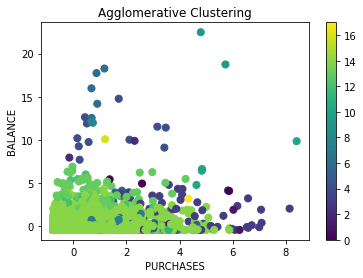

In [68]:
#after Standardization
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot
scatter = ax.scatter (Sd_data ['BALANCE'] , Sd_data ["PURCHASES"] , c= agglomerative, s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("BALANCE")
plt.colorbar(scatter)

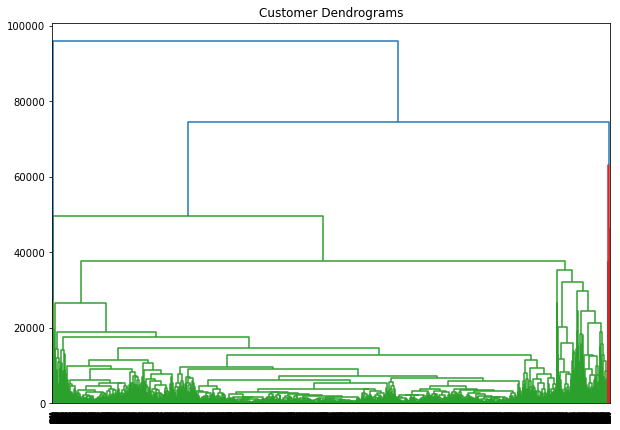

In [59]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [94]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

In [114]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,0.818182,-0.424900,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,0.786961,0.909091,-0.469552,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,0.447135,1.000000,-0.107668,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,0.049099,0.636364,0.232058,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,-0.358775,1.000000,-0.462063,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,1.000000,-0.333293,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,-0.742423,1.000000,-0.329136,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,-0.740398,0.833333,-0.401965,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,-0.745174,0.833333,-0.469552,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [95]:
labels=pd.DataFrame(kmeans.labels_)
labels  

,0
0,0
1,2
2,2
3,2
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [118]:
data['labels'] = labels
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,-0.731989,0.818182,-0.424900,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,0.786961,0.909091,-0.469552,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,0.447135,1.000000,-0.107668,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,0.049099,0.636364,0.232058,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,-0.358775,1.000000,-0.462063,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,1.000000,-0.333293,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,-0.742423,1.000000,-0.329136,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,-0.740398,0.833333,-0.401965,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,-0.745174,0.833333,-0.469552,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [119]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [120]:
#extract x and y from our data
x=data["BALANCE"].values[:,np.newaxis]
y=data["labels"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.8366546270291669
R squared 0.12577448354185683


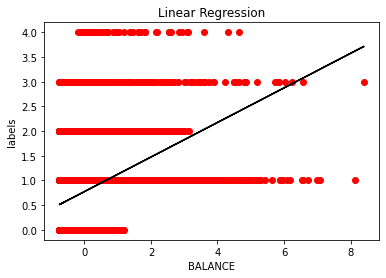

In [121]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("labels")
plt.xlabel("BALANCE")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

<AxesSubplot:title={'center':'histogram of balances acocording to the label'}, xlabel='labels', ylabel='Frequency'>

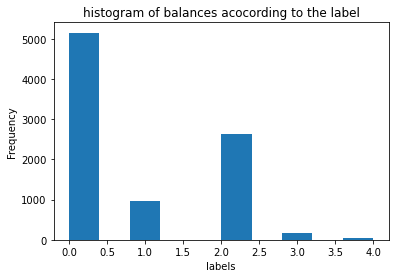

In [123]:
plt.title("histogram of balances acocording to the label")
plt.xlabel("labels")
plt.ylabel("balance")
data["labels"].plot.hist()

In [13]:
kmeans.predict(data)
print(kmeans.cluster_centers_)

[[3.38437741e+03 9.40633662e-01 1.58295903e+03 9.88230993e+02
  5.95038513e+02 2.11246771e+03 5.40499429e-01 3.16939855e-01
  3.85650235e-01 2.10080036e-01 5.72419775e+00 2.21322637e+01
  8.99427777e+03 2.89211053e+03 1.55916469e+03 1.35204183e-01
  1.17385082e+01]
 [8.54809529e+02 8.54161652e-01 6.02666564e+02 3.12080877e+02
  2.90884840e+02 4.94282667e+02 4.67368228e-01 1.54005733e-01
  3.52144432e-01 1.06792419e-01 2.25376113e+00 1.06555112e+01
  2.74239608e+03 9.95880355e+02 5.85241721e+02 1.56660059e-01
  1.14326067e+01]
 [4.84189326e+03 9.11252077e-01 1.07893056e+04 7.61968438e+03
  3.16979046e+03 5.15222013e+03 7.52377608e-01 5.99535492e-01
  6.04122562e-01 2.26540108e-01 9.20000000e+00 8.62000000e+01
  1.24657692e+04 1.81174305e+04 2.51500153e+03 3.34474108e-01
  1.18384615e+01]]


In [96]:
kmeans.cluster_centers_

array([[-3.72891597e-01,  8.51574079e-01, -2.37956741e-01,
         2.39037380e+02,  2.56076632e+02,  4.40962363e+02,
         4.50255924e-01,  1.27159017e-01,  3.47170252e-01,
         1.08008874e-01,  2.21259230e+00,  9.29537505e+00,
         2.08657501e+03,  8.31918650e+02,  5.32174042e+02,
         1.42240768e-01,  1.13540614e+01],
       [ 1.20608579e+00,  9.27919481e-01,  4.06389712e-01,
         1.19560582e+03,  6.75927146e+02,  2.29024981e+03,
         5.58873382e-01,  3.42726788e-01,  3.93394838e-01,
         2.07989942e-01,  5.58551941e+00,  2.46012592e+01,
         1.17677907e+04,  3.04455081e+03,  1.36313933e+03,
         1.56931547e-01,  1.17156348e+01],
       [ 1.71205387e-01,  9.05516449e-01,  1.22145452e-01,
         7.65857079e+02,  4.98699730e+02,  1.19012192e+03,
         5.37099280e-01,  2.87285925e-01,  3.78370879e-01,
         1.51309968e-01,  3.85013313e+00,  1.88109547e+01,
         6.13328377e+03,  2.06200105e+03,  7.78235674e+02,
         1.70492893e-01,  1.1

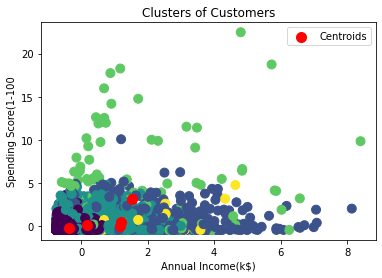

In [100]:
plt.scatter(data["BALANCE"],          
            data["PURCHASES"],s=80,c=labels[:])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()

In [112]:
Sum_of_squared_distances = []
k = range(1,20)
for i in k:
    km = KMeans(n_clusters= i)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

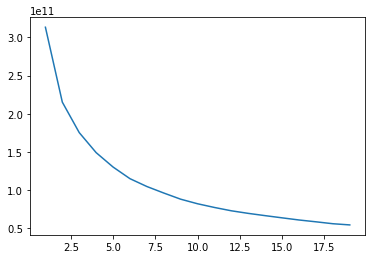

In [113]:
plt.plot(k,Sum_of_squared_distances)
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data)
data = data.values

In [15]:
"""plt.scatter(data["PURCHASES"], 
           data["BALANCE"],s=80,c='cyan',label='Careless')
plt.scatter(data["PURCHASES"], 
           data["BALANCE"],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.legend()
plt.show()"""

'plt.scatter(data["PURCHASES"], \n           data["BALANCE"],s=80,c=\'cyan\',label=\'Careless\')\nplt.scatter(data["PURCHASES"], \n           data["BALANCE"],s=80,c=\'burlywood\',label=\'Sensible\')\nplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c=\'red\', label = \'Centroids\')\nplt.title(\'Clusters of Customers\')\nplt.xlabel(\'PURCHASES\')\nplt.ylabel(\'BALANCE\')\nplt.legend()\nplt.show()'

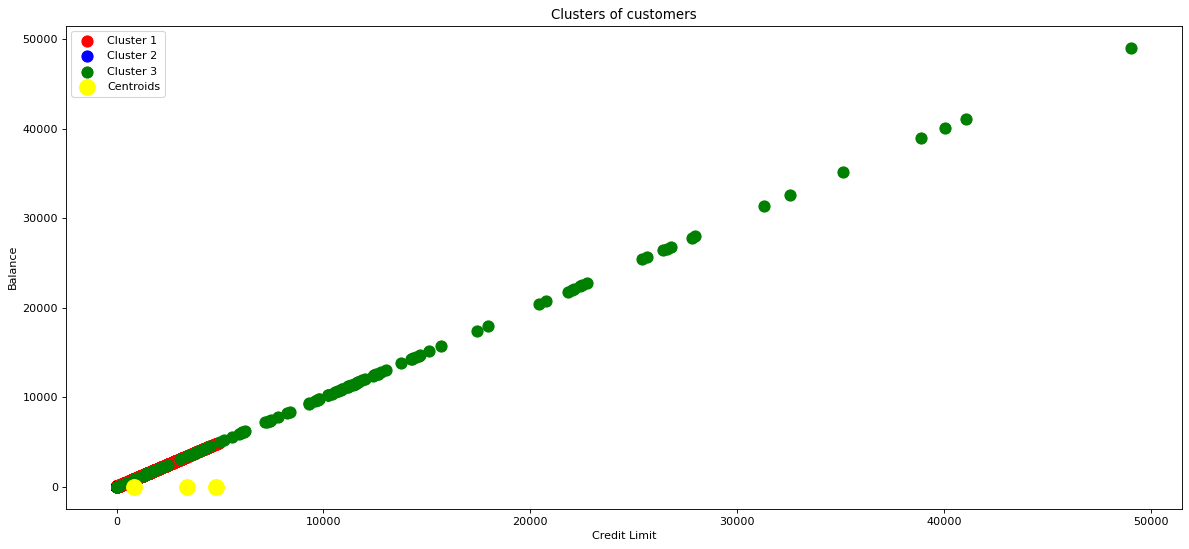

In [16]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[y_kmeans == 2, 2], data[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

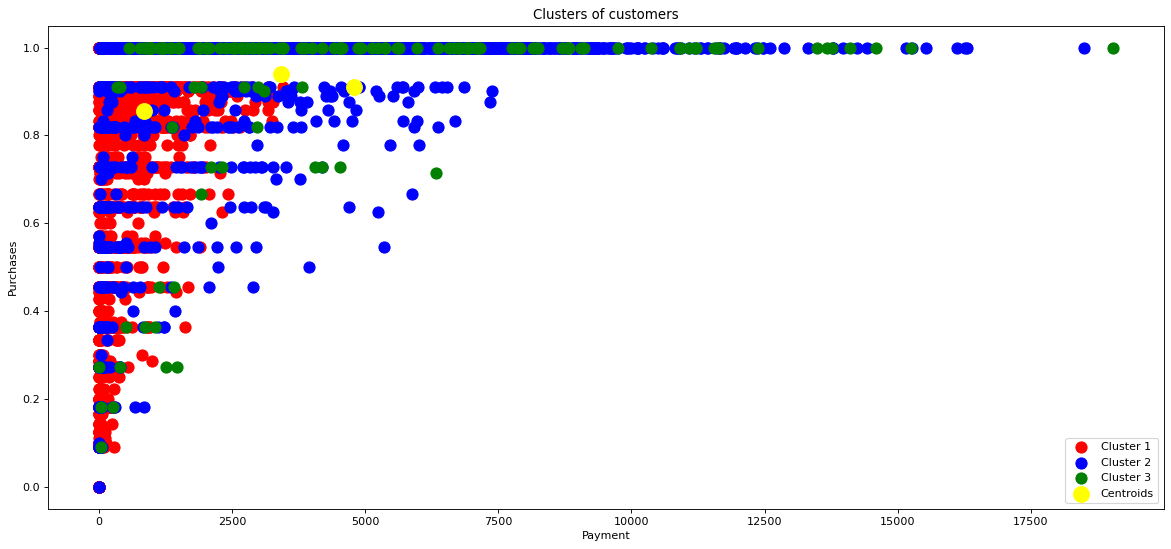

In [17]:
plt.scatter(data["Annual Income (k$)"][data.label == 0],          
            data["Spending Score (1-100)"][data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["Annual Income (k$)"][data.label == 1],
           data["Spending Score (1-100)"][data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["Annual Income (k$)"][data.label == 2],
           data["Spending Score (1-100)"][data.label == 2],s=80,c='green',label='Target')
plt.scatter(data["Annual Income (k$)"][data.label == 3], 
           data["Spending Score (1-100)"][data.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(data["Annual Income (k$)"][data.label == 4], 
           data["Spending Score (1-100)"][data.label == 4],s=80,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.legend()
plt.show()